In [1]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:


df=pd.read_csv("annual_data.csv")

In [3]:


df

,Period,Inst_sector,Inst_sector_code,Descriptor,SNA08TRANS,Asset_liability_code
0,2013.06,Non-corporate business enterprises,121,Closing balance total assets,LE00000,A000000
1,2013.06,Non-corporate business enterprises,121,Financial assets Closing balance Total financi...,LE00000,AFA0000
2,2013.06,Non-corporate business enterprises,121,Financial assets Closing balance monetary gold...,LE00000,AFA0100
3,2013.06,Non-corporate business enterprises,121,Financial assets Closing balance currency and ...,LE00000,AFA0200
4,2013.06,Non-corporate business enterprises,121,Financial assets Closing balance debt securities,LE00000,AFA0300
...,...,...,...,...,...,...
7291,2015,Total all sectors,900,Capital Account Closing balances Total non-fin...,LE00000,AN00000
7292,2015,Total all sectors,900,Capital Account Closing balances Produced non-...,LE00000,AN10000
7293,2015,Total all sectors,900,Capital Account Closing balances Non-produced ...,LE00000,AN20000
7294,2015,Total all sectors,900,Closing balance net worth,LE00000,B900000


In [4]:


df=df.drop('SNA08TRANS',axis=1)

In [5]:


df=df.drop('Descriptor',axis=1)

In [6]:


df=df.drop('Inst_sector',axis=1)

In [7]:


df

,Period,Inst_sector_code,Asset_liability_code
0,2013.06,121,A000000
1,2013.06,121,AFA0000
2,2013.06,121,AFA0100
3,2013.06,121,AFA0200
4,2013.06,121,AFA0300
...,...,...,...
7291,2015,900,AN00000
7292,2015,900,AN10000
7293,2015,900,AN20000
7294,2015,900,B900000


In [8]:


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7296 entries, 0 to 7295
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Period                7296 non-null   object
 1   Inst_sector_code      7296 non-null   int64 
 2   Asset_liability_code  7296 non-null   object
dtypes: int64(1), object(2)
memory usage: 171.1+ KB


In [9]:


df['Period']=pd.to_datetime(df['Period'])

C:\Users\admin\AppData\Local\Temp\ipykernel_10440\2930140844.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Period']=pd.to_datetime(df['Period'])


In [10]:


df

,Period,Inst_sector_code,Asset_liability_code
0,2013-06-01,121,A000000
1,2013-06-01,121,AFA0000
2,2013-06-01,121,AFA0100
3,2013-06-01,121,AFA0200
4,2013-06-01,121,AFA0300
...,...,...,...
7291,2015-01-01,900,AN00000
7292,2015-01-01,900,AN10000
7293,2015-01-01,900,AN20000
7294,2015-01-01,900,B900000


In [11]:


from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Period']=le.fit_transform(df['Period'])
df['Asset_liability_code']=le.fit_transform(df['Asset_liability_code'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7296 entries, 0 to 7295
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Period                7296 non-null   int64
 1   Inst_sector_code      7296 non-null   int64
 2   Asset_liability_code  7296 non-null   int32
dtypes: int32(1), int64(2)
memory usage: 142.6 KB


In [18]:


df

,Period,Inst_sector_code,Asset_liability_code
0,0,121,0
1,0,121,1
2,0,121,2
3,0,121,3
4,0,121,4
...,...,...,...
7291,3,900,19
7292,3,900,20
7293,3,900,21
7294,3,900,22


(array([ 768., 3072., 1536.,  384.,    0.,  384.,  384.,    0.,  384.,
         384.]),
 array([121. , 198.9, 276.8, 354.7, 432.6, 510.5, 588.4, 666.3, 744.2,
        822.1, 900. ]),
 <BarContainer object of 10 artists>)

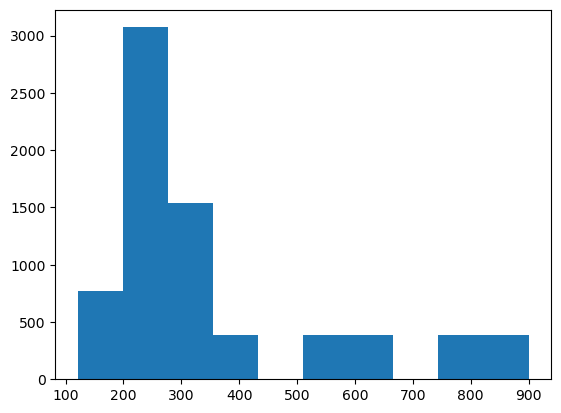

In [4]:


plt.hist(df['Inst_sector_code'])

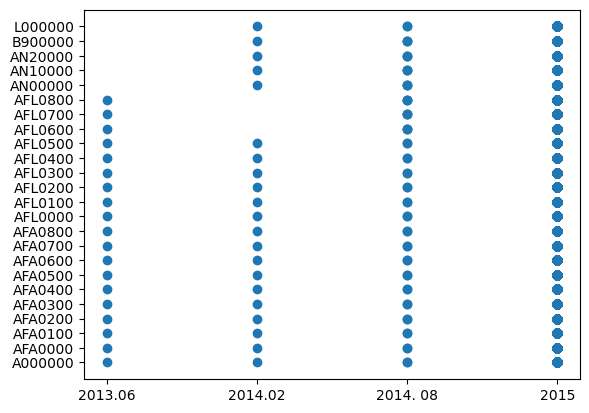

In [5]:


x=df['Period']
y=df['Asset_liability_code']
plt.scatter(x,y)

<BarContainer object of 7296 artists>

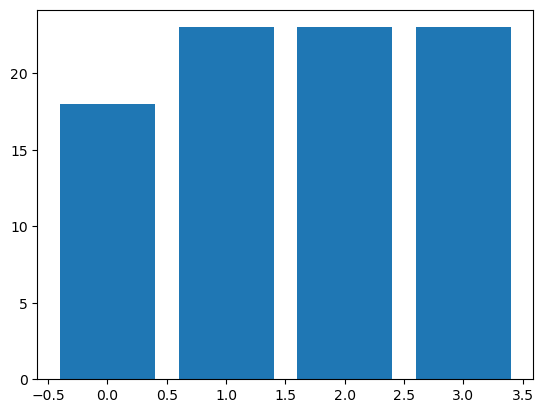

In [21]:


plt.bar(x,y)

In [22]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:


import warnings
warnings.filterwarnings('ignore')

In [24]:


get_ipython().system('pip install prophet')

  Obtaining dependency information for prophet from https://files.pythonhosted.org/packages/24/2b/834e9a347f2f0161e32a3c6125b8a1ebdf6ac33199a0ed3a0bdf1f0c296f/prophet-1.1.5-py3-none-win_amd64.whl.metadata
  Obtaining dependency information for cmdstanpy>=1.0.4 from https://files.pythonhosted.org/packages/e8/e2/2ddc273e726680a3c816f9a05c6726d57d61820fa7ab4753ed282d0a8bbe/cmdstanpy-1.2.0-py3-none-any.whl.metadata
  Obtaining dependency information for holidays>=0.25 from https://files.pythonhosted.org/packages/5d/8c/bad7c11afc8969834728c0678bbf8f3ec5dba4c4ac7f5ad8cf91d63e865f/holidays-0.40-py3-none-any.whl.metadata
  Obtaining dependency information for importlib-resources from https://files.pythonhosted.org/packages/93/e8/facde510585869b5ec694e8e0363ffe4eba067cb357a8398a55f6a1f8023/importlib_resources-6.1.1-py3-none-any.whl.metadata
  Obtaining dependency information for stanio~=0.3.0 from https://files.pythonhosted.org/packages/26/01/e2579afa3ad1eade8b54bf5b9e45790d219681b1f8f97edbd2f1

In [25]:


df=pd.read_csv("annual_data.csv")

In [26]:


df

,Period,Inst_sector,Inst_sector_code,Descriptor,SNA08TRANS,Asset_liability_code
0,2013.06,Non-corporate business enterprises,121,Closing balance total assets,LE00000,A000000
1,2013.06,Non-corporate business enterprises,121,Financial assets Closing balance Total financi...,LE00000,AFA0000
2,2013.06,Non-corporate business enterprises,121,Financial assets Closing balance monetary gold...,LE00000,AFA0100
3,2013.06,Non-corporate business enterprises,121,Financial assets Closing balance currency and ...,LE00000,AFA0200
4,2013.06,Non-corporate business enterprises,121,Financial assets Closing balance debt securities,LE00000,AFA0300
...,...,...,...,...,...,...
7291,2015,Total all sectors,900,Capital Account Closing balances Total non-fin...,LE00000,AN00000
7292,2015,Total all sectors,900,Capital Account Closing balances Produced non-...,LE00000,AN10000
7293,2015,Total all sectors,900,Capital Account Closing balances Non-produced ...,LE00000,AN20000
7294,2015,Total all sectors,900,Closing balance net worth,LE00000,B900000


In [27]:


df['Period']=pd.to_datetime(df['Period'])

In [28]:


df

,Period,Inst_sector,Inst_sector_code,Descriptor,SNA08TRANS,Asset_liability_code
0,2013-06-01,Non-corporate business enterprises,121,Closing balance total assets,LE00000,A000000
1,2013-06-01,Non-corporate business enterprises,121,Financial assets Closing balance Total financi...,LE00000,AFA0000
2,2013-06-01,Non-corporate business enterprises,121,Financial assets Closing balance monetary gold...,LE00000,AFA0100
3,2013-06-01,Non-corporate business enterprises,121,Financial assets Closing balance currency and ...,LE00000,AFA0200
4,2013-06-01,Non-corporate business enterprises,121,Financial assets Closing balance debt securities,LE00000,AFA0300
...,...,...,...,...,...,...
7291,2015-01-01,Total all sectors,900,Capital Account Closing balances Total non-fin...,LE00000,AN00000
7292,2015-01-01,Total all sectors,900,Capital Account Closing balances Produced non-...,LE00000,AN10000
7293,2015-01-01,Total all sectors,900,Capital Account Closing balances Non-produced ...,LE00000,AN20000
7294,2015-01-01,Total all sectors,900,Closing balance net worth,LE00000,B900000


<Axes: >

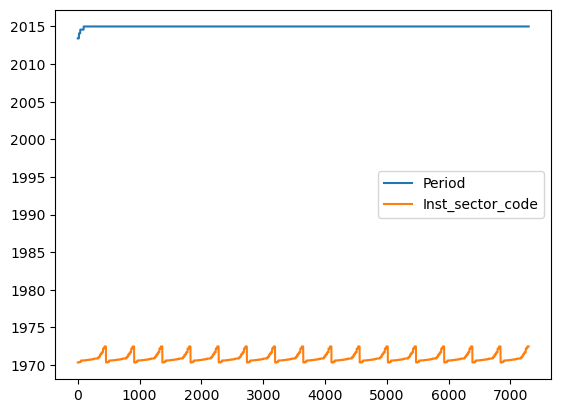

In [29]:


df.plot()

In [30]:


from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Asset_liability_code']=le.fit_transform(df['Asset_liability_code'])

In [31]:


df=df.drop('Inst_sector',axis=1)

In [32]:


df=df.drop('Descriptor',axis=1)

In [33]:


df=df.drop('SNA08TRANS',axis=1)

<Axes: >

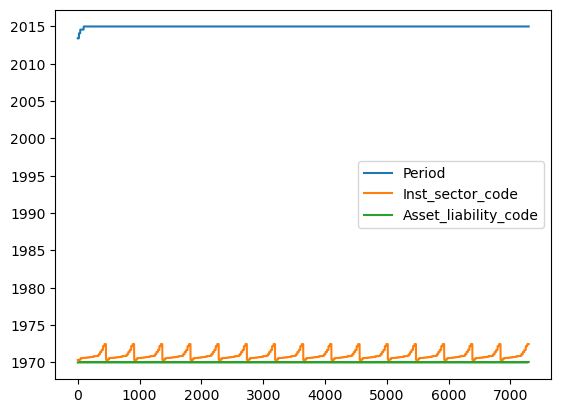

In [34]:


df.plot()

In [2]:
data=pd.read_csv("mm8.csv")

In [3]:
data

,Date,Mine,Equipment,Material,Shift,Operator,Address,Hours_Worked,Target_TPH,Actual TPH
0,1/1/2023,Vasanth Coal Mine,Shovel1,Overburden,Day,Ramesh Patel,221B Baker street Mumbai,8,5000,4735
1,1/1/2023,Vasanth Coal Mine,Truck1,Coal,Day,Aditya,50Laxmi nagar hyd,8,800,725
2,1/2/2023,Reddy Coal Mine,Shovel1,Overburden,Night,Vijay Kumar,144 Golf club road Bangalore,8,5000,4210
3,1/2/2023,Reddy Coal Mine,Truck2,Coal,night,Priya Sharma,multiline delhi,8,800,855
4,1/5/2023,RP minerals,Dragline1,Overburden,Day,Rahul Jain,G-13 Govt Complex Jaipur,10,7000,6320
5,1/5/2023,RP minerals,Truck1,Coal,Day,Ankit Desai,B-302 Solaris Mulund West Mumbai,10,900,1050


In [4]:
data['Date']=pd.to_datetime(data['Date'])

In [5]:
data

,Date,Mine,Equipment,Material,Shift,Operator,Address,Hours_Worked,Target_TPH,Actual TPH
0,2023-01-01,Vasanth Coal Mine,Shovel1,Overburden,Day,Ramesh Patel,221B Baker street Mumbai,8,5000,4735
1,2023-01-01,Vasanth Coal Mine,Truck1,Coal,Day,Aditya,50Laxmi nagar hyd,8,800,725
2,2023-01-02,Reddy Coal Mine,Shovel1,Overburden,Night,Vijay Kumar,144 Golf club road Bangalore,8,5000,4210
3,2023-01-02,Reddy Coal Mine,Truck2,Coal,night,Priya Sharma,multiline delhi,8,800,855
4,2023-01-05,RP minerals,Dragline1,Overburden,Day,Rahul Jain,G-13 Govt Complex Jaipur,10,7000,6320
5,2023-01-05,RP minerals,Truck1,Coal,Day,Ankit Desai,B-302 Solaris Mulund West Mumbai,10,900,1050


In [6]:
data.set_index('Date',inplace=True)

In [7]:
data

,Mine,Equipment,Material,Shift,Operator,Address,Hours_Worked,Target_TPH,Actual TPH
Date,,,,,,,,,
2023-01-01,Vasanth Coal Mine,Shovel1,Overburden,Day,Ramesh Patel,221B Baker street Mumbai,8,5000,4735
2023-01-01,Vasanth Coal Mine,Truck1,Coal,Day,Aditya,50Laxmi nagar hyd,8,800,725
2023-01-02,Reddy Coal Mine,Shovel1,Overburden,Night,Vijay Kumar,144 Golf club road Bangalore,8,5000,4210
2023-01-02,Reddy Coal Mine,Truck2,Coal,night,Priya Sharma,multiline delhi,8,800,855
2023-01-05,RP minerals,Dragline1,Overburden,Day,Rahul Jain,G-13 Govt Complex Jaipur,10,7000,6320
2023-01-05,RP minerals,Truck1,Coal,Day,Ankit Desai,B-302 Solaris Mulund West Mumbai,10,900,1050


In [8]:
data=data.drop('Mine',axis=1)

In [9]:
data=data.drop('Equipment',axis=1)

In [10]:
data=data.drop('Material',axis=1)

In [11]:
data=data.drop('Shift',axis=1)

In [12]:
data=data.drop('Operator',axis=1)

In [13]:
data=data.drop('Address',axis=1)

In [14]:
data=data.drop('Hours_Worked',axis=1)

In [16]:
data=data.drop('Target_TPH',axis=1)

In [17]:
data

,Actual TPH
Date,
2023-01-01,4735
2023-01-01,725
2023-01-02,4210
2023-01-02,855
2023-01-05,6320
2023-01-05,1050


In [21]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data, order=(0, 1, 1)) 
results_ARIMA = model.fit()

results_ARIMA.summary()

C:\Users\admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Actual TPH   No. Observations:                    6
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 -46.353
Date:                Wed, 10 Jan 2024   AIC                             96.707
Time:                        11:06:20   BIC                             95.926
Sample:                             0   HQIC                            94.610
                                  - 6                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9935      1.079     -0.921      0.357      -3.107       1.120
sigma2      5.157e+06   2.13e-07   2.42e+13      0.000    5.16e+06    5.16e+06
===================================================================================
Ljung-Box (L1) (Q):                   4.88   Jarque-Bera (JB):                 0.72
Prob(Q):                              0.03   Prob(JB):                         0.70
Heteroskedasticity (H):               2.81   Skew:                             0.60
Prob(H) (two-sided):                  0.52   Kurtosis:                         1.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

In [27]:
a=results_ARIMA.forecast(3)

C:\Users\admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [32]:
a

6    2617.552862
7    2617.552862
8    2617.552862
Name: predicted_mean, dtype: float64

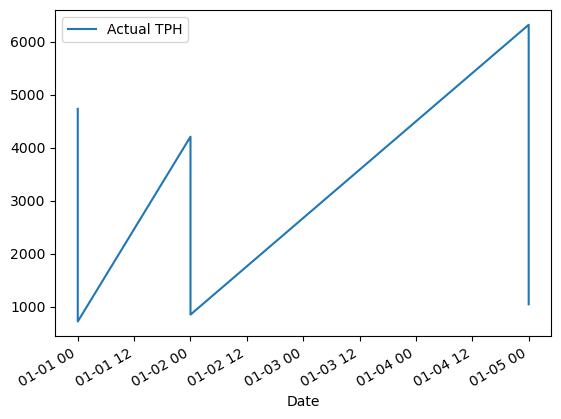

In [31]:
a
data.plot()
plt.show()